# Project 1.2

In [3]:
# Filter all warnings.
# spurious warnings.
import warnings
warnings.filterwarnings('ignore')

In [4]:
import numpy as np
import scipy as sp
import scipy.spatial.distance as spd
import scipy.cluster.hierarchy as sph
import sklearn as sk
import sklearn.cluster as skc
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
sns.set(style='white', color_codes=True, font_scale=1.3)

In [5]:
artists = pd.read_csv("data/artists.csv",delimiter="\t")
artists.sample(5)

,Artist,Gender,Type,Country,Tags
2352,頑童MJ116,NaN,NaN,NaN,NaN
616,Noita,NaN,NaN,NaN,NaN
225,Small Leaks Sink Ships,NaN,Group,NaN,"math rock,Progressive rock,indie,indie rock,Pr..."
852,Macy Gray,Female,Person,US,"soul,female vocalists,rnb,funk,pop,seen live,N..."
1353,欲音ルコ♂キレ,NaN,NaN,NaN,NaN


In [16]:
# unique list of traits.
all_tags = []

for artist in artists['Tags']:
    if pd.isnull(artist):
        continue
    
    tags = artist.split(',')
    
    for tag in tags:
        tag_new = tag.strip()
        if not tag_new in all_tags:
            all_tags.append(tag_new)

all_tags = sorted(all_tags)
len(all_tags)

17728

In [18]:
# create dummy variables.
tags_dummy = []
for ts in artists['Tags']:
    tis = [0] * len(all_tags)
    
    if pd.isnull(ts):
        tags_dummy.append(tis)
        continue
    
    tags = ts.split(',')
    for t in tags:
        t_new = t.strip()
        tis[all_tags.index(t_new)] = 1
    tags_dummy.append(tis)

In [19]:
# create a DataFrame.
names = artists['Artist']
tags_df = pd.DataFrame(tags_dummy, columns=all_tags, index=names)

In [28]:
# remove insignificant variables
all_totals = []
for tag in all_tags:
    total = tags_df[tag].sum()
    
    if total <= 1:
        print(tag)
        
        tags_df = tags_df.drop(columns=tag)

'90s
- -Haggard- -
- -mems- -
-M-
-miyavi-
-oz-
00s alternative
00s c-pop
00s chinese female vocalists
00s female vocalists
00s j-pop
00s jpop
02-01-2011
0215
0315
0414
0614
0616
08a interested in
0nhaku
1 litre of tears
1 percenters
1 star
1-5
1014
10s chinese female vocalists
10s folk
10s indie
10s japanese female vocalists
111
11get
120 minutes
130626
130816
1337
14 june
1690 cello
18
1800s
1900-1959
1910s
1925-03-26
1959
1966
1970s
1970s Soul
1975
1975-05-05
1980
1981-05-03
1982-06-17
1984
1984-05-30
1985
1985-debut
1987
1987 idol j-pop
1987 j-pop
1987 pop
1990s pop
1990s vibes
1M
1ja
1llionaire
1lord
1st Vine
1st vine acid
2 Pac
2 amazing songwriters
2 mal live
2 of 10 stars
2 pistols
2 times
2-bit
20
2000's
2005
20051022
2006-
2007-
2008 American Idol Winner
2008 debuts
2008-
2008favourite
2009-
2010 Dallas Observer Music Awards nominee
2010 debuts
2010 j-rock
2010 rock
2010-12-09
2011 debuts
2012 j-pop
2012 pop
2013 Winnipeg Folk Festival
2013 k-pop
2013 pop
2013-
2014 debuts
20

Bright Eyes
Brilliance
Briternative
British Black Metal
British Psychedelia
British Punk
Britney runner up
Brits
Broadway Divas
Broken World Media
BrokenCyde
Brooke Fraser
Brown Bread
Bruce Springsteen
Bruno Mars
Brutal Melodic Death Metal
Brutal Rapcore
Brutal as Fuck
Brutal slamming death metal
Bsides queen
Bubblegum and Pigtails
Buck 65
Buck Tick
Buck-Tick
Buckethead
Buffalo
Buffy the Vampire Slayer
Bum Wiggler
Burl Icle Ivanhoe Ives
Busta Rhymes
Butter 08
Byron Bay
BØRNS
C-JeS Entertainment
C50F
C64
CA
CC
CD Baby
CD I stole
CEO of SM Entertainment
CH-Rap
CHEMICAL SYSTEM LE
CHILL NEW AGE
CHILL-
CHOO CHOO TRAIN 2k5
CINEMACORE
CLSID not unique
COCKSUCKER
CSS
Cadence
Cage the Elephant
Cake
Caleb Nott
Caleb Shomo
California Punk
California Rock Clube
Cam Hutch
Cambridge bay
Camden SC
Camisa de Venus
Canadian Artist
Canadian Lovers
Canadian Pwnge
Canadian Technical Death Metal
Canadian Vocalist
Canadian punk
Cannuckrock
Cantautrici
Canterbury
Canto Indie Pop
Cantow
Carly Rae Jepsen
Carri

Futuristic Hybrid Metal
Futuristic swag
Futuristic swag gettin my dick suck from the back on a teleportation pad
G-Unit Records
G-land
G3
GA
GENTE CHE NON HA UN CAZZO DA FARE
GIL ME
GIRUGAMESH
GLASSJAW
GODS MUSIC
GOTHIC-POP
GREENDAY
GRIM AND FROSTBITTEN
GROUPLOVE
GUTE Musik
Ga best
Ga electro
GaYoon
Gabriel Basile
Gabriel Milliet
Gabriela
Gabriella
Gabriella Christina De Almeida Rinne
Gaijin Rock
Gaijin-Rock
Galileo
Galileo Galilei
GalileoGalilei
Galneryus
Galvanism
GaragePsychAcidRock
Garden State
Garm
Garry Schyman
Gary Valenciano
Gasevin
Gasoline
Gavin DeGraw
Gavrilov
Gay Fish
Geeky
Gemma Hayes
Gene Autry
General Heavy Metal
General New Age
Genie Zhuo
Geologycore
Georgia Nott
German Bands
German Black Metal
German Comedy
German Folk
German Progressive Metal
German Punk
German language
Gesu no Kiwami Otome
Ghibli
Ginuwine
Gira
Girl-Boy Duet
Girls that kick ass
Giza
Glasgow Bands
Glastonbury
Glastonbury 2007
Glastonbury 2010
Gleba Gleba
Gleen
Glenn Miller Orchestra
Gloom pop
Gnar
Go-G

Kurds are hell handsome but not tender what a pity
Kurisumasu
Kurt Cobain
Kurupt
Kute
Kuu
Kwon BoA
Kygo
Kylie Minogue
Kyu Sakamoto
KyuHyun
Kyung
LAREINE
LC:AZE
LCD Soundsystem
LE
LGBT artists
LIL BOOSIE
LMC
LO-FI FOLK
LOVE ASIA
LOVESTORY
La roux
Ladies who rock
Ladyhawke
Laerm
Laleh
Lali Puna
Lana Del Rey
Landy
Lang Lang the greatest
Las Vegas NV
Lasses Favorites
Last.fm
Late Night Alumni
Latin Danzig
Latin Grammy nominee
Latin Rock
Latin Urban
Latina Rock Goddesses
Latyrx
Laughter is the best medicine
Laura Welsh
LazySunday
Le Guess Who 2008
Lea Michele
Lea Salongs
Led Zeppelin
Left Eye
Left of the Dial
Leftfield Electronic
Legaia
Legends of J-Music
Legit jpop
Leicester
Len
Lena Katina
Les Miserables
Lesbian Adoration
Lesbian Metal
Lesser Known Yet Slightly Streamable Artists
Lest We Forget
Lets chill in the dark
LiVe SHowS
Library
Lieblingssongs
Life is Like a Boat
Lifehouse
Light Music
Light Rock
Like a Prayer
Like this
Lil Boosie and Webbie
Lil Jon
Lila Downs
Lily Allen
Lin Jun Jie

Phil MacIsaac
Philip Glass
Philippine music
Philippinian
Phillippines
Phonat
Photo Finish Records
Piano Concerto
Piano house
Pico Poco
Pilate
Pilita Corrales
Pillows
Pinoy Artist
Pitbull
Pitchfork Festival 2009
Placebo
Planet X
Planetenwind
Playlist1
Plenty
Plies
Pocket Chestnut
Podcasts
Poison
Poison The Well
Polar
Polaris
Polski Hip Hop
Pomplamoose
Pop House
Pop Latino
Pop Songs
Pop and rock
Pop talent beautiful
Pop-Swing
Popstep
Porno graffitti
Portable Disco
Porter Wagoner
Portrait of my Love - Steve Lawrence
Portugal. the Man
Post G-Funk
Post Thrash Metal
Post hardcore metal posthardcore atmospheric czech
Post-Rhythm and Blues
Post-radical
Postal Service
Postmodern Rock
Power Thrash Metal
Power Trio
Power ballad
Power groove
Powerful female voices
Prelude
Pretty Fucking Good
Pretty Girls Make Graves
Pretty man
Primitive Rock n Roll
Prince Buster
Prinzen
Producers
Prog Folk
Prog Pop
Prog-Rock
Progessive Metal
Progpearls
Progressive Black Death Metal
Progressive Death Black Metal
Pr

The Black Skirts
The British are coming
The Brobecks
The Calling
The Chemical Brothers
The Cranberries
The Cure
The Demo Saou
The Dresden Dolls
The Dudes
The Dust Brothers
The Elder Scrolls
The Faint
The Fall Of Troy
The Fiery Furnaces
The Flaming Lips
The Fold
The Fool
The Format
The Fray
The Gathering
The Goo Goo Dolls
The Great Escape 2007
The Hollies
The Hoosiers
The Japans
The Jazz Body
The Killer
The King
The King of Pop
The L Word
The Last Shadow Puppets
The Living End
The Man
The Mills Brothers
The Mountain Goats
The Naked and Famous
The National
The Offspring
The Pack
The Painted Veil
The Pharmacy
The Pillows
The Postal Service
The Pussycat Dolls
The Rasmus
The Receiving End of Sirens
The Smiths
The SugarCubes
The Supremes
The Temptations
The Ting Tings
The Trees and The Wild
The Trews
The Unicorns
The Vaselines
The Weeknd
The White Stripes
The Works
The answer
The best J-RnB singer
The best rock band
The greatest
The human League
The most important bands in my life
The peaks


alternative r and b
alternative symphonic metal
alternative vk
alternative-rock-metal-indie
alternatives2indies
alternatywa
alterwakrie
altmetal
alto
alvternative
always stuck in my head
aly
amal
aman aman
amanda
amanda perez
amanda seyfried
amatue
amazing artist
amazing beyond all belief
amazing live
amazing lyrics
amazing rapper
amazing singer
amazing sound
amber
ambien in sound form
ambience
ambient  guitar
ambient dildocore
ambient drone doom
ambient drone doom metal
ambient dubstep
ambient industrial
ambient jazz
ambient minecraft
ambient noise
ambient post-metal
ambient punk
ambient ram
ambient-pop
ambiental sludge
ambientcraft
ambiguous artist name
ambiyen
amei
amelia meath
amerian metal
american gothic
american indie
american pianist
american pie
american pop
american popular song
american rock and roll
american songbook
american swing
americas artmusik
amici del fantabosco
amigo
amo denais
amon amarth
amor
amor louco
amorzinho
amplified
amsterdam
amy grant
amy is my hero
amy m

best songs ever
best voice ever
best women singers
bestcore
beste texte seit langem
bester geiger der welt
bestie
bestradio
beta-lactam ring
better than 99 percent of post rock
better than Amber
better than HyunA
better than IU
better than Lady Gaga
better than aPink
better than anything you listen to
better than asking alexandria
better than dir en grey
better than girls generation
better than iggy
better than me
better than most bands
better than nightwish
better than the arctic monkeys
better than the beatles
better than you
better than your faves
between the buried and me
bey babu po yebalu
beyond awesomesauce
beyond beautiful
beyond me
bidlocore
big band jazz
big band sound
big boobs
big pun
big sky builders
big voice
bigg band
biggest mistake of obamas presidency
bill
bill kaulitz
billy joel
bimbeminkia
bimbo
bionic
bioshock
bioshock soundtrack
bipping
birds that sing with their wings to woo
bisexual
bishop
bishop lamont
bit
bit stupid
bitch can sang
bitch mob
bitches
bitgaze
bit

classicism
classytrendypoppychick
claude debussy
claymore
clazziquai
clean cut
clean vocals
clear pronunciation
clever and funny
cliche
clickclack
clicks´n´cuts
clifford brown
clinically romantic
clinton
club bangers
club house
club jazz
club-dance
clumsy sky
cmoa
cmu
co no mi chi
co-ed duo
co-ed group
co-ed vocalists
coachella 2008
cocktail hour christmas time
cocolulu
cocorosie
code geass ost
codeine
coed
coed duo
coed group
coffee house
coffee prince ost
cold meat industry
cold play
colette carr
colin davis
collage
collection
colobocuro
colorful
colorfull
colors
colossal faggot
colour artist
coma-chi
combinacion rara
comedy metal
comedy rap
comfort food
comfortable
comic
comic song
commercial
communist
completely nice to listen to
complex
complicated
compositions
computer
computer games
computer generated
concept albums
concert of the dead
concert resume
concerts i have been to
concious rap
conductors
confident my taste is better than yours
connected
connecticut
connie francis
conor

e-walker
ear plugs
eargasmic
earl sweatshirt
early recordings
earnest
earring
earth wind fire
earthy
eas
eason
east
east coast Rap Hip-Hop
east hartford
east meets west
east of england
eastern ethnic
eastern vocal
easy
easy going
easy listening classic
easy listening metal
eatin slabs of human meat
ebm-powernoise-psytrance
ebm-psytrance
ebony bones
echosmith
eclectic prog
economics
ecstatic
ed
ed banger records
eddie vedder
edenbridge
edguy
edgy
edible onion
edinburgh
edouardo lalo
eelectronica
efdsf
efedrynaAdrenalina
effable voices
effects
egofm
egy young
egypt
egyptian death metal
egyptian rock
ehime
eighties inspired indie
eighties-pop
eileikbateidountoun
el laberinto del fauno
el paso
el perro del mar
elaine page
elbandidos favourites
elctronic
elecronic
electorinc
electoronic music
electric fusion
electric punk
electric rock
electro bomb
electro dance
electro gothic
electro hip-hop
electro house electronic japanese dance
electro jazz
electro kei
electro kitch
electro metal
electr

fluffy
flumroc
fluxfm
fluxus
fly high
flying with anna
fnc
fob
fobby type music
foghat
fok
folk act
folk ambient
folk experimental
folk fusion
folk me
folk psicodelico
folk singer-songwriter
folk trip
folk under 2000 listeners
folk-country
folk-dance
folk-dancing
folk-delica
folk-jazz
folkgdchill
folkies
folklore
folklore intellectuel
folklore mexicano
folkloric-dance
folkloric-dancing
folkmetal
folkpunk
folksy
folktronika
folkwank
fondamentalmente inutili
for instagram scrolling
for kids
for pedophiles
forStudy
force plays
foreign lounge
forest
forgive durden
forgotten
forgotten empire
former teen wunderkids
fort worth
forth
forward thinking
foster the people
found out about on my own
found sounds
found:pennyarcade
four breasts
fox news
fox pop
foxes
foxy brown
fpa
fpop
fra
frame drums
francaise
francesa
franceses
franco
francophonic
francophonie
francorock
frank iero
franz ferdinand
franz joseph Haydn
franz waxman
franzoesisch
française
fratellis
freak-folk
freakfolk
freaking awesome

group of people who are
groupBoy
groupTAMASHI
growl
grown folks music
grp records
grrl
grrls i Brody Dalle
grrrlcore
grumpy still skin
grunge metal
grunge revival
grungegrass
gtfo
guadalajara
guanajuato
guay
gucci gucci
guelph
guilherme dalmeida
guilty crown
guitar drone
guitar folk
guitar hero III
guitar noise
guitar porn
guitarra
guitarrista mujer
guitarry
guitars
guogang
gustav
gute  mucke
guter rap ist rar
guttural slam
guttural slamming brutal death
guys who sound like girls
gymgym weds
gypsy jazz
gypsy swing
hONDURAS
hXc
ha
ha:tfelt
hacienda
haciendajazz
hack
haddaway
hadouken
haeryung
haim
haiti
haitian disco
haken
haku
halcali
halftoned singles club
halmstad
hamasaki
hamburg
hamdan
hammock
hanaregumi
handclaps
handmade
hangeng
hank
hannah montana
hannover
hansruedi wittwer
happiness
happy metal
happy music for when I feel down
happy speedcore
happygoodfunandhandclaps
har sett live
harajuku dance kei
hard beatz
hard indie rock
hard techno
hard-pop
hardcore breaks
hardcore funk
h

involves auto tune but sounds fucking awesome
inward
ioruba
ipod touch
iranian folk
iranian fusion
iranian jazz
iree pianist
iris
irish indie
irish metal
irish rock
irish traditional
irvine
is
is love
is supposedly god on other planets
isaiah rashad
isf2009
ishii shuuji
islande
israeli Ofra Haza
israeli ethno-pop
israeli middle eastern
israeli pop
isshoman
it
it is not indie assholes
it made me sick so i need a doctor
it takes to another place
italia
italian black metal
italian female
italian indie-alternative
italian metalcore
italian music
italian pop
italian prog
italian songwrigter
italian songwriters
italian speedrock
italian vocalist
italo revival
italodisco
itchy worms
itchyworms
itoglu
itpop
its alright
its barbie bitch
itsy bitsy
itunes store
iwasaspy
j cole
j core
j heif
j holiday
j metal
j rap
j tune entertainment
j- pop
j--j
j-classic
j-dancehall
j-darkwave
j-dorama
j-dub
j-electronica
j-favorits
j-female
j-female vocalists
j-group
j-hard rock
j-hip-hop-rip slyme
j-hip-pop


la coka nostra
la face
la laiterie
la mort du rap game
labari
ladies code
lady female
lady rock
lady woman
ladytron
lagrosseradio
lain
lain iwakura worship
lake
lakey the kid
lala
lalamusic
lamb of god
lame
lame lame lame lame
laminate pet animal
lana
landy wen
lanet olsun sana
lang
lang lang
lang:spanish
language:mandarin
lansing mi
lantis
laptop
largeheartedboy
las vegas performer
laserdance
lash
last discoveries
lastadd-test
lastfm radio
lastfm radio discovery
lastwordfreak
laswell
late nigh alumni
late night jazz
late of the pier
latin american
latin and mediterranean
latin music
latin reggae
latino americain
latinperc
latitude 2007
latitude 2009 rumour
latitude 2016
latvia
latvian
launchbar
laura mvula
lauryn hill
lavuvoice
lawrence
lax
lax music
laxcore
lay it down
lazers
lc aze
le couleur
le gros label
le tigre
leaf records
leapsandbonnaroo2010
learnin
learning
leathermouth
leaves eyes
leb isf
lebanese french fusion
lebanese singer
lebanese solo artists
lebanese trip-hop
lebanon

metropolis
mew
mexican curious
mexican folk
mexican progressive rock
mexicana
mexicore
mfl
mflo
mftag
miami bass
miami horror
miaou
micah
michael buble
michael crawford
michael gira
michael holliday cw
michael jacksons brother
michael mcdonald
michelle
michelle branch
michelle williams
michi
michiel van der kuy
michigan metal
michiru yamane
micky
micropenis
microsound
mid 90s
mid tempo
mid-90s
mid-tempo
middle eastern fusion
middle eastern jazz
middle eastern trip - hop
middle school
middlesex
midi
midori no hibi
midwest hip hop
midwest hip-hop
midwest-emo
midwestern
midwestmo
mie
mierda
miguel
mijope
mike jones
mike patton
mike shinoda
mike will
mike will made-it
mikio hirama
miku hatsune
mikureamo
miles davis
miles kane
miley
miliyah kato
milla
millionaires
millitant vegan straight edge
millitant vegan straight edge metalcore
millyah kato
milwaukee
mimi
minah
mine favoritter
minecraft
mingus
minho
minimal and ambient
minimal disco
minimal drone
minimal electronic
minimal rock
minimal

nihongo
niice one
niji
nike boots
nikkei
nine days
nine inch nails
nine years old
ninja
ninomiya kazunari
nintendo metal
nintendo-pop
nintendogaze
nintendogrind
nip-hop
nippon awesomeness
nipsey
nipsey hustle
nishikawa takanori
nishikido ryo
nishino
niszowy
nitz43 loves
niyaz
nnjn
no body knows the trouble I see
no glam just fucking slam
no hits
no idea
no label
no limit
no more sex
no one rly cares about her
no pain in pop
no stage presence
no surname
no1
noble label
nobody
nockalm quintett
nodame cantabile
nofx
nog luisteren
nogizaka46
noho
nois
noise funk
noise gaze
noise metal
noise rap
noise-folk
noise-funk
noise-hop
noisecore techno
noisepop
noiserock
noisetrade
noisetrade favorites
noisy
nomak
nomasde
non fanno ridere
non the artists
non visual
non-binary
non-commercial
non-pop
non-verbal
non-visual
none
none but Jesus
nono
noooooooooooooooooooo
nordic metal
norm tier
norma jean
norrkoping
nortec
north london
north-european
northeast garage punk
northern
northern irish
northwest

poppers gavotte
poppish
popskapunk
popular duo
porcys poleca
pork
porn soundtrack
porngrind
porno graffiti
pornogrind
pornstar
porqueria
porter
porter robinson
portishead
portland oregon
portland urban outfitters music
portugese
portugues
poser
posers
possible aoty
possibly
possibly auditory
post deathcore
post electro
post grunge folk
post hitching post
post progressive djenty rock
post sludge
post something
post trip hop
post tropical sadcore
post-
post- metal
post-Britpop
post-adult contemporary
post-anal experience
post-apocalyptic
post-avant jazzcore
post-card
post-crabcore
post-death metal
post-deathcore
post-dilla
post-djent
post-electro-mellow-idm-techno-jota-18-m-aviles
post-electronica
post-experimental
post-gospel
post-grass
post-hardcore female
post-hc
post-hip-hop
post-huipizdacore
post-j-pop
post-jazz
post-metalish
post-music
post-new-wave
post-nusantara
post-revolutionary pop song
post-rock and friends
post-rock emo
post-rock with vocals
post-rock with vocals post-rock
p

sakura gakuin
sakurai atsushi
sakurai sho
salak
salem
salinas
salisbury
salt lake city
salvador
salyu
salzgitter
sam smith
samavayo
same-band-different-instruments
sample pop
samplism
samurai brutal death thrash metal
samurai shodown
samurai spirit skinheads
samwave
san antonio
san bernardino
san pedro
sandisfinis
sandy
sandy e junior
sandy lam
santiago dobles
santigold
santogold
sarah bonito
sarah chang
sarahs favourites
sarangi
sascha paeth
saskatchewan
satanic death metal
satanic metal
satanism
satisfaction
satisfying
satriani
saul williams
savage life
saw at kiss concert 2003
saw live at the basement
saw these dudes
saxo
saxophonist
scandi
scandinavia
scandinavian girls: 80s
scandinavian music thats not metal
scandinavian soul
scarlatti
scarling
scarub
scene Belge
scene slam
scenecore
scenegrind
schmemo
schmitz lofi
school food punishment
school of lock
schwabinger schicksen
schwaermerisch
schweden
schwul
sci fi
sci-fi
sci-fi metal
science
science podcast
scissor sisters
scorpions


steveadams fm
stevie
stex
still love crazy guys
stockton
stole my boyfriend
stolen recordings
stomp clamp
stomp clap
stoned
stoner doom
stoner jazz
stoner sludge
stoner-doom metal
storaas
storasfestivalen 2007
stories
story corps
story of isaac
story of the year
storytelling
stradivarius
straight edge hardcore
straight edge kircore
straight-ahead jazz
straightalk
strange famous
strange music inc
strangely deep voice
stratovarius
stravinsky
strawberry machine
strawberry panic
stream of consciousness
streamable yet hummable
street luv
streetpunk
stremnaya baba oret
stride
stride piano
string
string band
stringband
stromae
strong female artists
strong vocals
strong women
stuart murdoch
study music
stuff I like
stuff I should be able to inject directly into my blood
stuff i need to check out
stuff that should be injected directly into my blood
stuff that should have been good but actually sucks
stuff you cant help but love
stunningperformer
stupid flanders
stuttgart
style
su-pa fu-lai
sub


to get
to get list
to listen more of
to listen soon
to load
to lose la track
to nie jest kurwa techno
to scrobble
to see live 2
to the heart
to-discover
to-do
tobuy
todos os dias se possivel
togawa jun
toheart
tokushima
tokyo jihen
tokyo virginity pop
tolistento
tolkien metal
tom
tom denney
tom jobim
tom kaulitz
tom morello
tomlab
tommyfebruary6
tomwaits
tonsler
tony
tony bennett
too catchy
too hot
too many girls
too much fun
too sexy
too young to be this good
top 3 favourites
top act
top artist for a week
top is the fucking man
top of 2011
top of 2012
top stuff
top vocals
top25
topnotch
tora
tore johansson
tori
tori amos
torontonians
torres
total bollocks
total eargasm
total wife material
totally awesome
totally experimental and weird
totally underrated
totry
touch
touch and go
touching
touhou arrangements
touhou trance
towa tei
toy
toy music
toys factory
tpop
tr-808
tracker
traditional japanese influences
train song
trance folk
trance hop
trance-breaks
tranki
transcendent
transgressi

wonky rock
wood and string
woods
woodstock artists
woollim entertainment
woop
woozy
words cannot describe the love
worked with
workradio
worl music
world dance
world ends with you
world folk jazz
world froove
world guitar
world lounge
world pop
world-fusion
worldmusic
worldpop
worse than akiko shikata
worse than brokencyde
worse than celine dion
worse than justin bieber
worship from Australia
worship song
worship songs
worshipful songs
worst
worst haircut ever
worst japanese music
worst of 2010
worst of 2017
worst of japan
worst of japanese music
worthless music
wota
would
would be so much heavier if they didnt have clean vocals
would kill to see live
would pop to see live
wpierdol
writer
ws2010 - 16
wtf at emo tag
wtf is this shit
wu
wu-tang
wukulele
wunderschoen
www daytrotter sessions
wyclef
wynton marsalis
wyolica
x japan related
xanax
xandria
xcatalystx records
xclusiv musiq
xenosaga
xiah junsu
xjapan
xmas fun
xtin
xuan
xuan xuan
xzibit
y li
yacht
yacht rock
yadong
yael naim
yakit

In [30]:
tags_df.to_csv("tags.csv", header="True")

In [31]:
tags_df.sample(5)

,,'00s,-,-artist,-malanhoern,0,00's,000,007,00s,...,yy,z,zac efron,zach hill,zara larsson,zavtra,zeroplays,zz,防弾少年団,방탄소년단
Artist,,,,,,,,,,,,,,,,,,,,,
りょ子 - Just For Fun,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Lana Del Rey,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Smoove,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TETSU69,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Henry Chong,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Lyrical Analysis

In [68]:
import nltk
import gensim
import pyLDAvis.gensim

In [93]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /home/edel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/edel/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/edel/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/edel/nltk_data...


True

In [110]:
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')

en_stop = nltk.corpus.stopwords.words('english')

print(en_stop)

p_stemmer = nltk.stem.porter.PorterStemmer()

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [84]:
lyrics = pd.read_csv("data/lyrics.csv",delimiter="\t")
lyrics.sample(5)

,Song,Artist,Lyrics
177,"Steady, as She Goes",The Raconteurs,Find yourself a girl and settle down\Live a si...
29,For Miles,Thrice,"I know one day, all our scars will disappear, ..."
397,The Afterman,Coheed and Cambria,She gave her heart to a falling star\When news...
173,暁,DIR EN GREY,NaN
496,"Ready, Steady, Go!",L'Arc~en~Ciel,READY STEADY CAN'T HOLD ME BACK\READY STEADY G...


In [85]:
lyrics_col = lyrics['Lyrics']

In [122]:
texts = []
texts_tuple = []

for lyric in lyrics_col:
    if pd.isnull(lyric):
        continue
    
    raw = lyric.lower()
    
    tokens = tokenizer.tokenize(raw)
    
    stopped = [i for i in tokens if not i in en_stop]
    
    stemmed = [p_stemmer.stem(lyric) for lyric in stopped]
    
    texts.append(stemmed)
    
    texts_tuple += stemmed

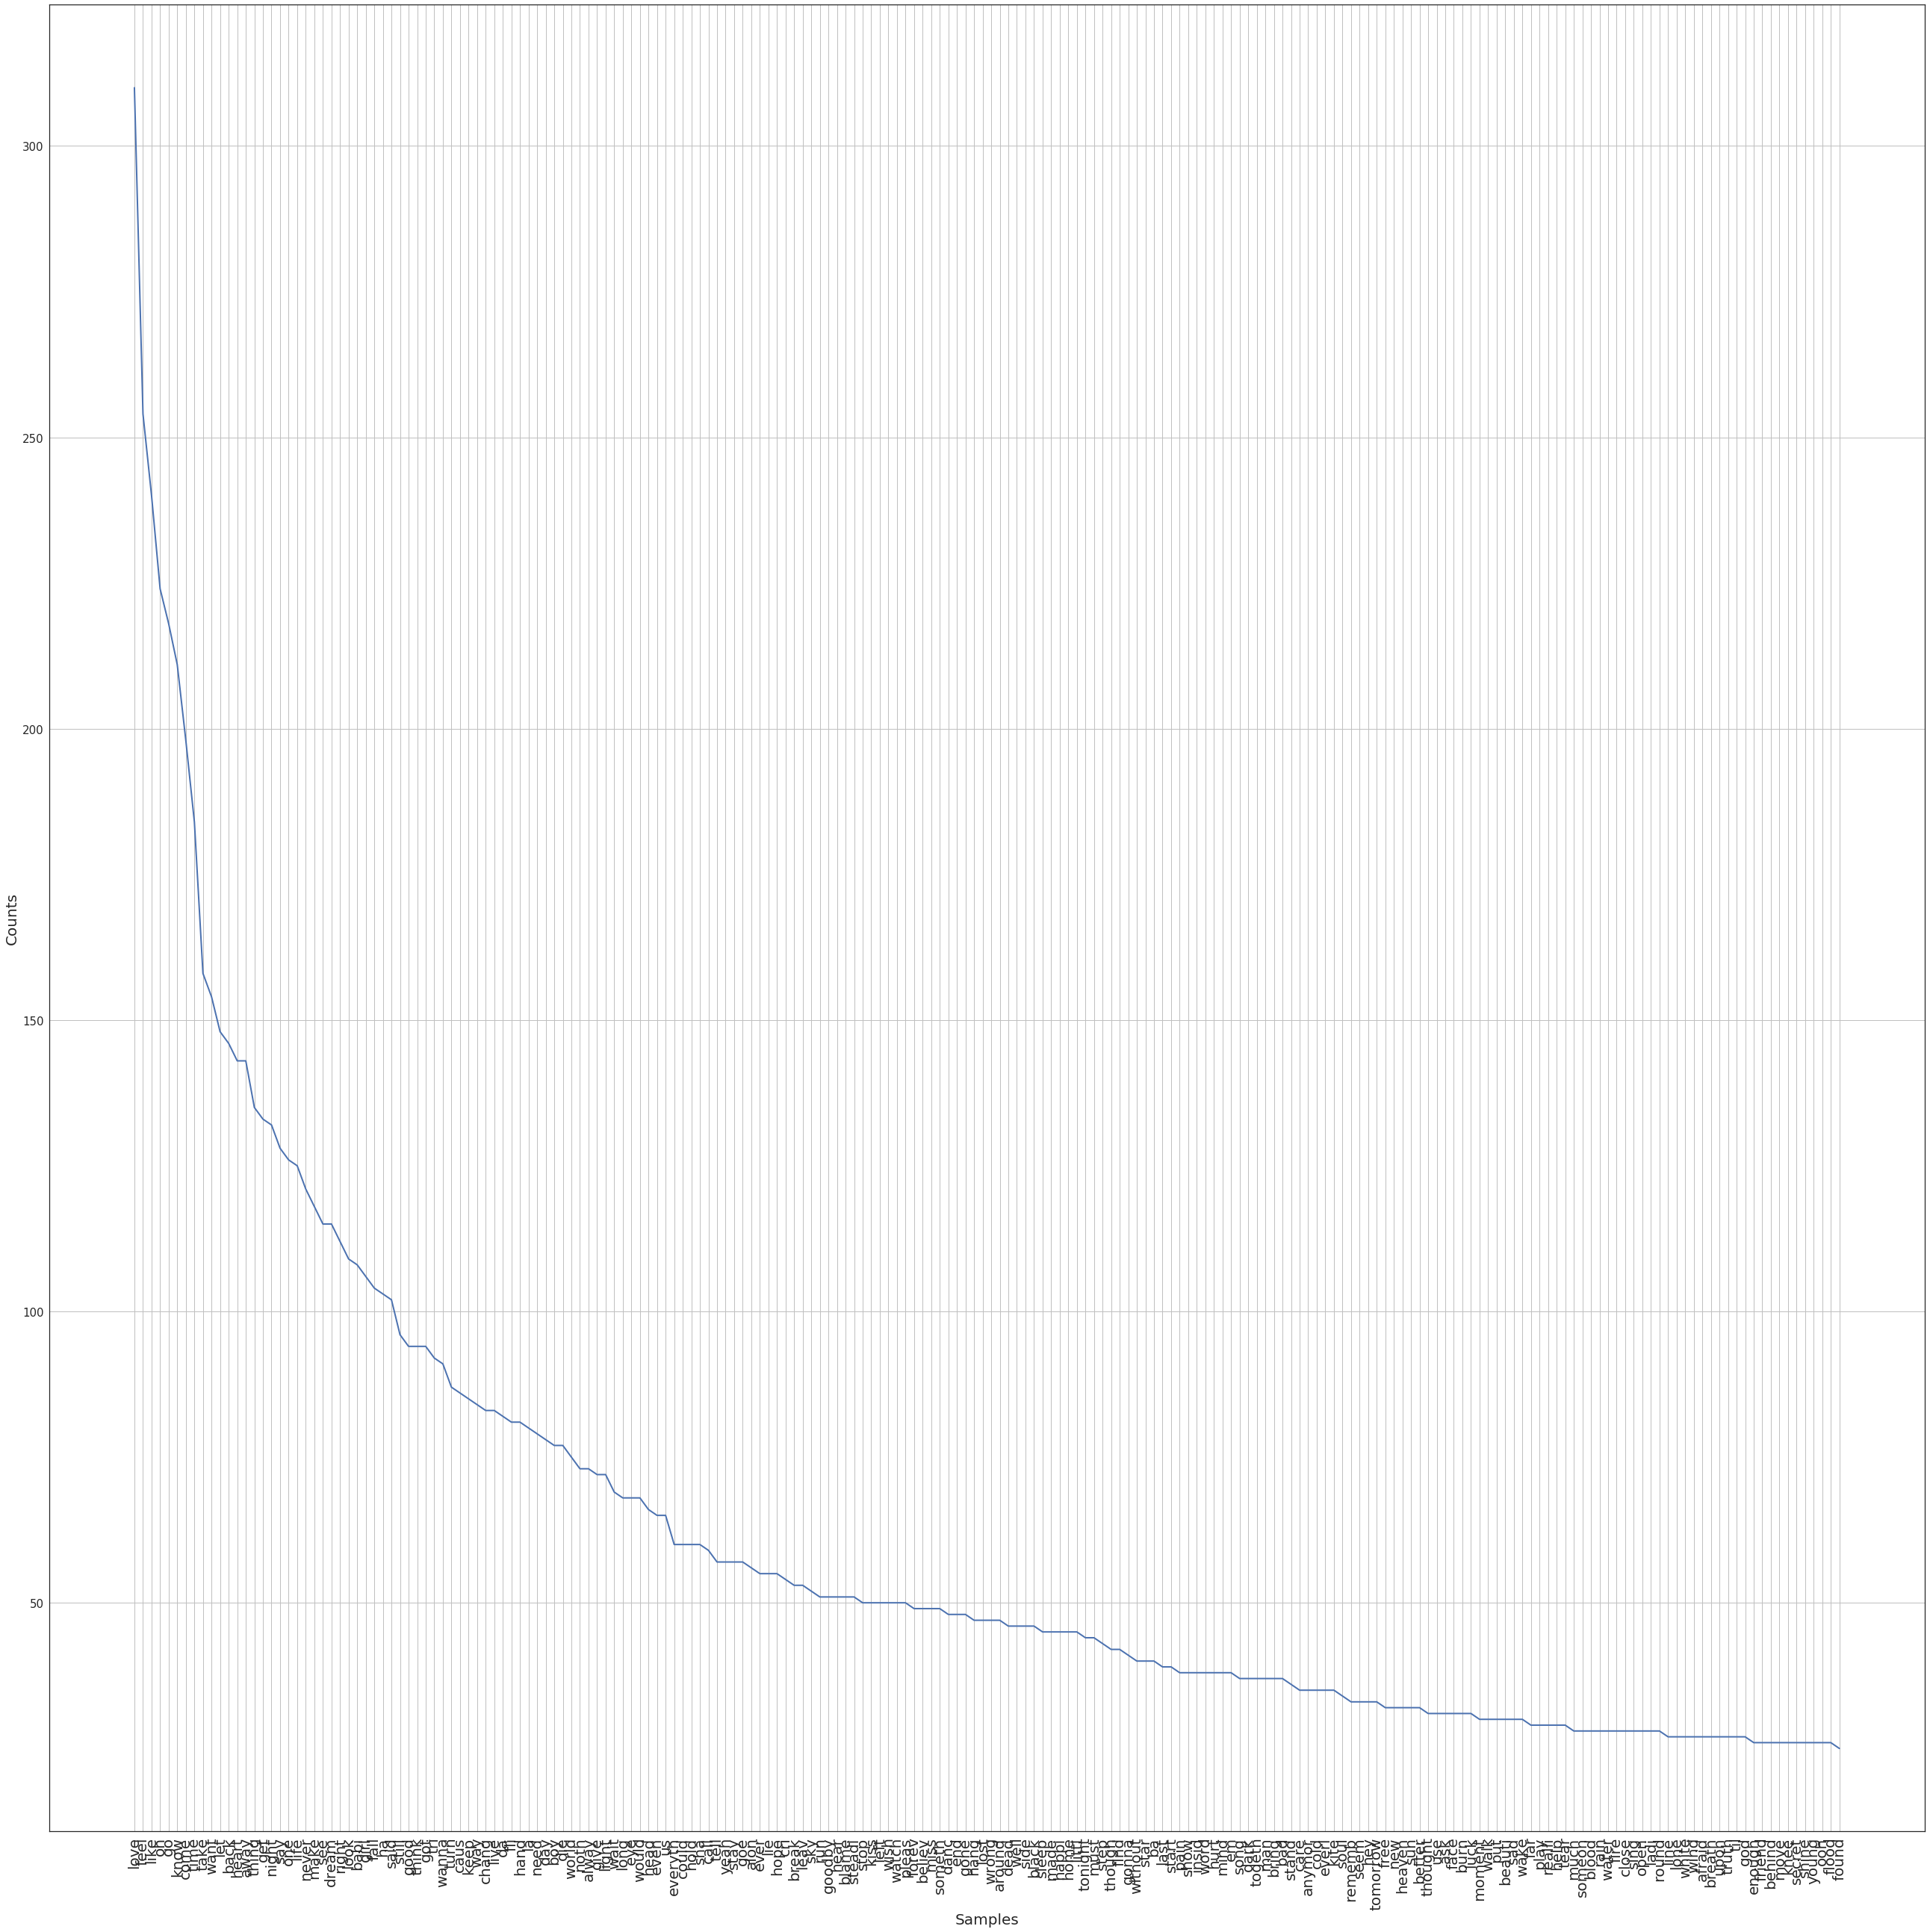

In [150]:
import matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(45, 45))
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=15) 

plt.xlabel('xlabel', fontsize=20)
plt.ylabel('ylabel', fontsize=20)

fd = nltk.FreqDist(tuple(texts_tuple))
fd.plot(200)

In [152]:
dictionary = gensim.corpora.Dictionary(texts)
print(dictionary)

Dictionary(4884 unique tokens: ['3am', '4', 'act', 'alibi', 'alreadi']...)


In [153]:
corpus = [dictionary.doc2bow(text) for text in texts]

In [154]:
print(corpus)

[[(0, 1), (1, 1), (2, 4), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 3), (18, 3), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 4), (25, 1), (26, 1), (27, 1), (28, 4), (29, 5), (30, 1), (31, 1), (32, 1), (33, 1), (34, 8), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 2), (42, 4), (43, 3), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 2), (54, 2), (55, 1), (56, 2), (57, 1), (58, 1), (59, 3), (60, 1), (61, 4), (62, 8), (63, 1), (64, 1), (65, 1), (66, 2), (67, 1), (68, 1), (69, 2), (70, 1), (71, 1), (72, 2), (73, 1), (74, 2), (75, 3)], [(10, 1), (21, 1), (23, 1), (27, 1), (29, 2), (30, 1), (33, 10), (34, 1), (36, 1), (37, 1), (43, 1), (53, 1), (61, 2), (68, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 12), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 2), (94, 1), (95, 1), (96, 1), (97, 

In [161]:
num_topics = 10
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=num_topics, id2word = dictionary, passes=20)

In [162]:
print_lda = ldamodel.print_topics(num_topics=num_topics, num_words=10)

for x in print_lda:
    print(x)

(0, '0.028*"oh" + 0.013*"danc" + 0.012*"chang" + 0.009*"take" + 0.009*"good" + 0.009*"tri" + 0.008*"keep" + 0.008*"love" + 0.008*"uh" + 0.008*"head"')
(1, '0.031*"feel" + 0.016*"night" + 0.013*"hang" + 0.012*"go" + 0.011*"let" + 0.009*"fall" + 0.009*"em" + 0.008*"hand" + 0.008*"like" + 0.008*"get"')
(2, '0.028*"like" + 0.018*"wanna" + 0.012*"round" + 0.011*"notic" + 0.011*"got" + 0.011*"feel" + 0.010*"state" + 0.010*"emerg" + 0.009*"l" + 0.009*"bung"')
(3, '0.014*"fli" + 0.014*"like" + 0.012*"want" + 0.012*"kite" + 0.009*"away" + 0.007*"come" + 0.007*"think" + 0.006*"give" + 0.006*"babi" + 0.006*"heart"')
(4, '0.023*"da" + 0.015*"chiquitita" + 0.012*"mai" + 0.008*"sing" + 0.008*"new" + 0.008*"doom" + 0.008*"cool" + 0.008*"let" + 0.007*"see" + 0.007*"song"')
(5, '0.027*"ha" + 0.016*"sha" + 0.011*"da" + 0.011*"heart" + 0.010*"ba" + 0.009*"take" + 0.009*"love" + 0.009*"feel" + 0.008*"get" + 0.008*"time"')
(6, '0.022*"come" + 0.014*"know" + 0.012*"never" + 0.011*"right" + 0.011*"thing" + 0

In [92]:
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

/home/edel/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]
